In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
from sklearn import linear_model
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

C:\Users\admin\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
df = pd.read_csv("C:\\Users\\admin\\Desktop\\trainhakathon1.csv")
print(df.shape)
print(df.info())

(1000, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Sr 1.             1000 non-null   int64
 1   Headache          1000 non-null   int64
 2   Cough             1000 non-null   int64
 3   fever             1000 non-null   int64
 4   throat infection  1000 non-null   int64
 5   vomiting          1000 non-null   int64
 6   corona positive   1000 non-null   int64
dtypes: int64(7)
memory usage: 54.8 KB
None


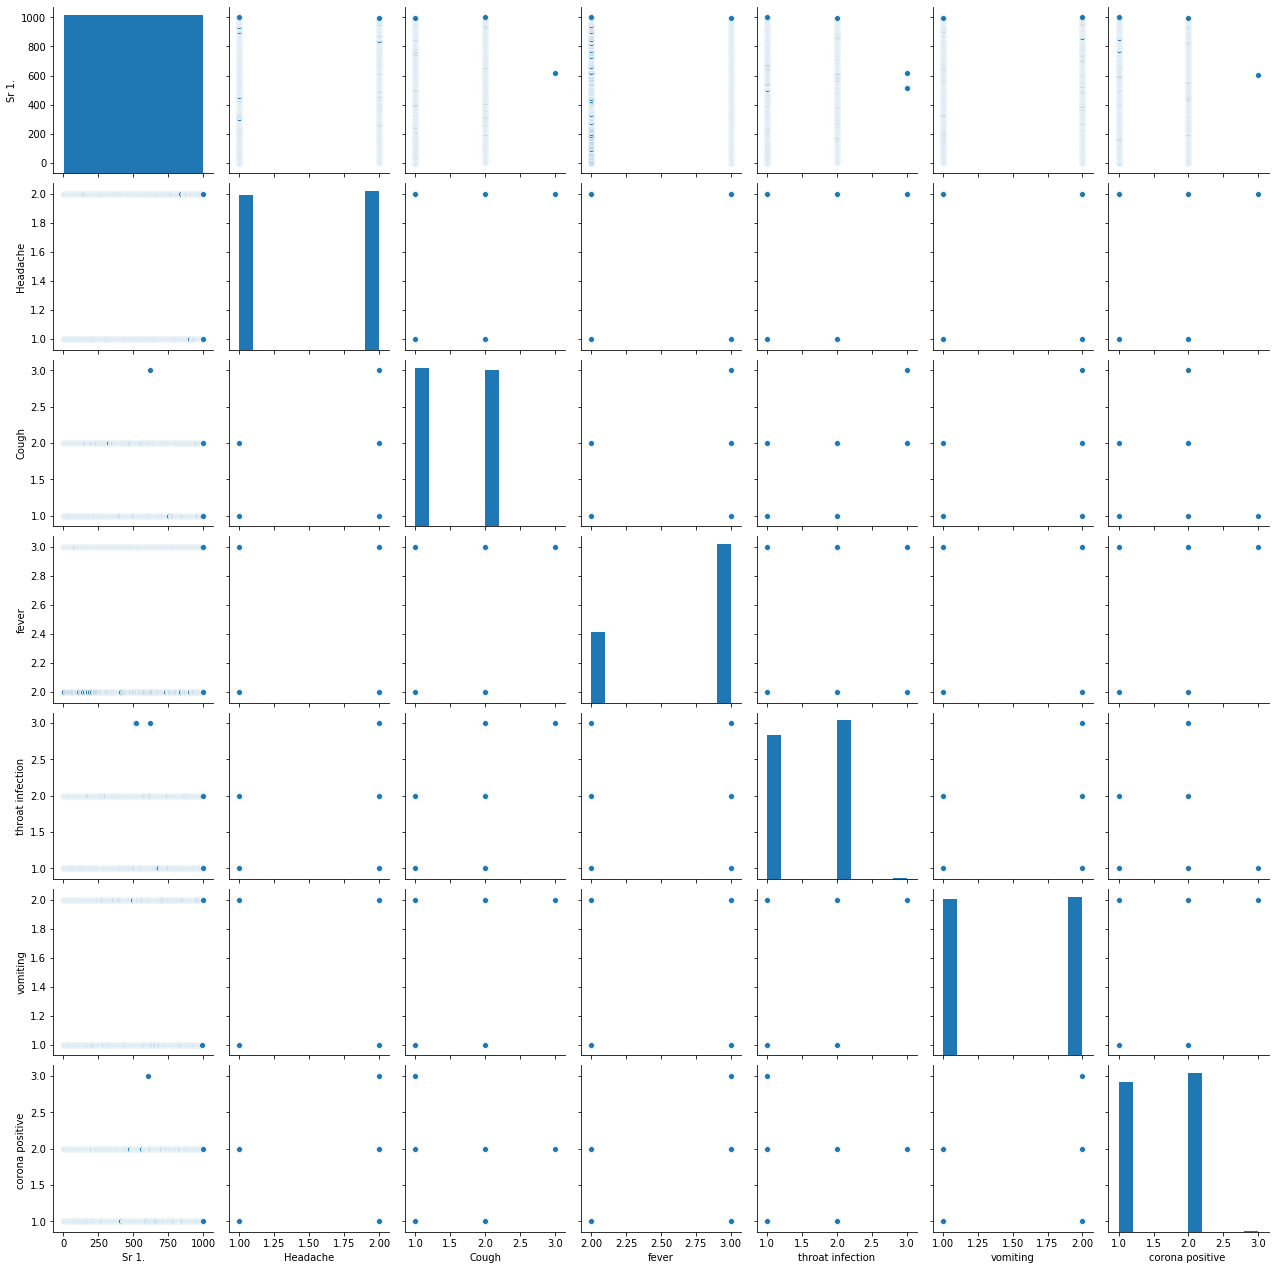

In [3]:
sb.pairplot(df)

                     Sr 1.  Headache     Cough     fever  throat infection  \
Sr 1.             1.000000 -0.061652 -0.039621 -0.076103         -0.030260   
Headache         -0.061652  1.000000 -0.025827 -0.002796         -0.060053   
Cough            -0.039621 -0.025827  1.000000  0.071448         -0.017413   
fever            -0.076103 -0.002796  0.071448  1.000000          0.009219   
throat infection -0.030260 -0.060053 -0.017413  0.009219          1.000000   
vomiting         -0.061229  0.045932 -0.031838  0.006177         -0.045861   
corona positive  -0.019263  0.031509  0.319803  0.057987          0.175766   

                  vomiting  corona positive   
Sr 1.            -0.061229         -0.019263  
Headache          0.045932          0.031509  
Cough            -0.031838          0.319803  
fever             0.006177          0.057987  
throat infection -0.045861          0.175766  
vomiting          1.000000          0.033691  
corona positive   0.033691          1.000000  

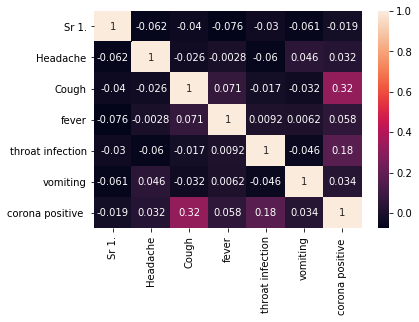

In [4]:
df1  = df.corr()
print(df1)
sb.heatmap(df1,annot=True)

In [6]:
df.drop(columns=['Sr 1.'],inplace=True)
df.head()

,Headache,Cough,fever,throat infection,vomiting,corona positive
0,1,1,3,1,2,1
1,1,1,2,1,2,2
2,2,2,3,1,1,1
3,1,1,3,2,2,2
4,2,2,3,1,1,2


In [7]:
df.isnull().sum()

Headache            0
Cough               0
fever               0
throat infection    0
vomiting            0
corona positive     0
dtype: int64

In [8]:
from sklearn import linear_model
regress = linear_model.LogisticRegression()
df2 = df.values
train_x = (df2[:,0:4])
train_y = df2[:,5]
print(train_x.shape)
print(train_y.shape)

(1000, 4)
(1000,)


In [9]:
regress.fit (train_x,train_y)
print ('Coefficients: ', regress.coef_)
print ('Intercept: ',regress.intercept_)

Coefficients:  [[-0.28891902 -0.52321513 -0.19938431 -0.23537721]
 [-0.06116894  0.88980801 -0.04480556  0.62217085]
 [ 0.35008797 -0.36659288  0.24418987 -0.38679364]]
Intercept:  [ 4.16792659  0.05295396 -4.22088054]


In [10]:
df = pd.read_csv("C:\\Users\\admin\\Desktop\\testhakathon fianl.csv")
print(df.shape)
print(df.info())

(100, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   S.1.              100 non-null    int64
 1   Headache          100 non-null    int64
 2   Cough             100 non-null    int64
 3   Fever             100 non-null    int64
 4   Throat Infection  100 non-null    int64
 5   Vomiting          100 non-null    int64
 6   Coronavirus       100 non-null    int64
dtypes: int64(7)
memory usage: 5.6 KB
None


In [13]:
df.drop(columns=['S.1.'],inplace=True)
df.head()

,Headache,Cough,Fever,Throat Infection,Vomiting,Coronavirus
0,1,2,3,1,2,2
1,2,1,1,2,1,2
2,2,2,1,2,2,1
3,2,2,1,1,1,2
4,1,1,2,2,2,2


In [14]:
df.isnull().sum()

Headache            0
Cough               0
Fever               0
Throat Infection    0
Vomiting            0
Coronavirus         0
dtype: int64

In [35]:
df3 = df.values
test_x = (df3[:,0:4])
test_y = df3[:,5]
print(test_x.shape)
print(test_y.shape)

(100, 4)
(100,)


In [36]:
y_predicted = regress.predict(test_x)
for i in range(0,len(test_x)):
    print(test_y[i],y_predicted[i])
df['Pred']=y_predicted
df
df.to_csv("C:\\Users\\admin\\Desktop\\testhakathon fianl.csv")

2 2
2 1
1 2
2 2
2 1
1 1
1 2
2 1
1 2
1 1
1 2
2 2
1 2
1 1
1 1
2 1
1 2
2 2
1 2
2 1
2 2
1 2
1 2
2 2
1 1
2 1
2 2
2 1
1 2
2 2
1 2
2 1
2 2
1 1
2 1
1 2
2 1
2 1
1 1
2 2
1 2
2 2
2 1
2 2
1 1
2 2
1 2
1 2
1 1
2 2
1 1
2 1
1 1
2 2
2 1
2 1
1 1
2 2
2 2
1 2
2 1
2 1
1 1
2 2
1 1
1 1
1 1
2 2
1 2
2 2
1 1
2 2
2 1
2 2
2 2
1 1
1 1
1 1
2 1
1 1
1 1
1 1
1 1
1 1
2 2
2 2
2 2
1 1
2 2
2 1
1 2
2 2
2 2
1 1
2 2
1 1
1 1
2 2
1 1
1 2


PermissionError: [Errno 13] Permission denied: 'C:\\Users\\admin\\Desktop\\testhakathon fianl.csv'

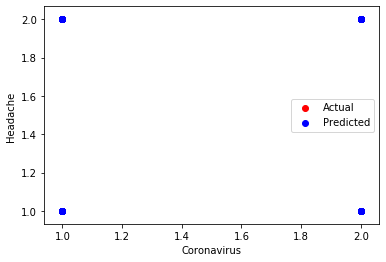

In [37]:
plt.scatter(df['Coronavirus'],df['Headache'],color='red',label='Actual')
plt.scatter(df['Pred'],df['Headache'],color = 'blue',label = 'Predicted' )
plt.xlabel('Coronavirus')
plt.ylabel('Headache ')
plt.legend()
plt.show()

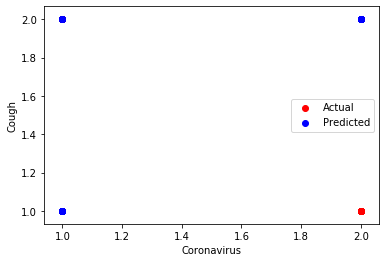

In [38]:
plt.scatter(df['Coronavirus'],df['Cough'],color='red',label='Actual')
plt.scatter(df['Pred'],df['Cough'],color = 'blue',label = 'Predicted' )
plt.xlabel('Coronavirus')
plt.ylabel('Cough')
plt.legend()
plt.show()

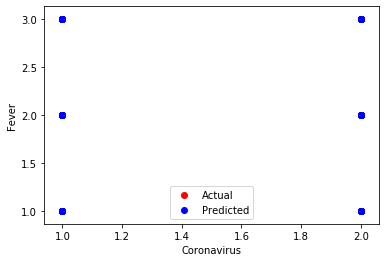

In [39]:
plt.scatter(df['Coronavirus'],df['Fever'],color='red',label='Actual')
plt.scatter(df['Pred'],df['Fever'],color = 'blue',label = 'Predicted' )
plt.xlabel('Coronavirus')
plt.ylabel('Fever')
plt.legend()
plt.show()

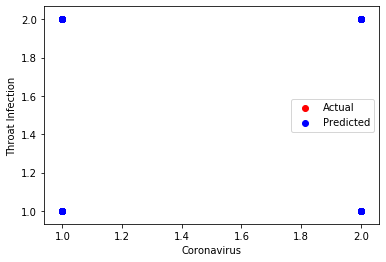

In [40]:
plt.scatter(df['Coronavirus'],df['Throat Infection'],color='red',label='Actual')
plt.scatter(df['Pred'],df['Throat Infection'],color = 'blue',label = 'Predicted' )
plt.xlabel('Coronavirus')
plt.ylabel('Throat Infection')
plt.legend()
plt.show()

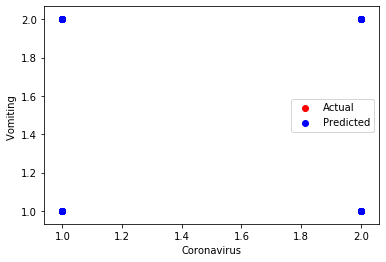

In [41]:
plt.scatter(df['Coronavirus'],df['Vomiting'],color='red',label='Actual')
plt.scatter(df['Pred'],df['Vomiting'],color = 'blue',label = 'Predicted' )
plt.xlabel('Coronavirus')
plt.ylabel('Vomiting ')
plt.legend()
plt.show()

In [42]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(test_y, y_predicted))
print('Confusion Matrix\n',metrics.confusion_matrix(test_y,y_predicted))


Accucary: 0.61
Confusion Matrix
 [[30 19]
 [20 31]]


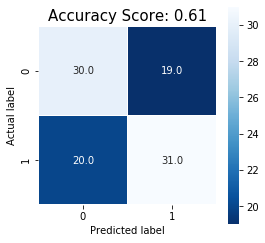

In [43]:
plt.figure(figsize=(4,4))
sb.heatmap(metrics.confusion_matrix(test_y,y_predicted), annot=True, fmt=".1f", linewidths=.90, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(metrics.accuracy_score(test_y, y_predicted))
plt.title(all_sample_title, size = 15);

In [44]:
from sklearn.metrics import classification_report
print(classification_report(test_y,y_predicted))

              precision    recall  f1-score   support

           1       0.60      0.61      0.61        49
           2       0.62      0.61      0.61        51

    accuracy                           0.61       100
   macro avg       0.61      0.61      0.61       100
weighted avg       0.61      0.61      0.61       100



In [45]:
X = df.iloc[:, :5]
Y = df.iloc[:, 5]
X = np.array(X)
Y = np.array(Y)

In [46]:
X

array([[1, 2, 3, 1, 2],
       [2, 1, 1, 2, 1],
       [2, 2, 1, 2, 2],
       [2, 2, 1, 1, 1],
       [1, 1, 2, 2, 2],
       [2, 1, 1, 1, 1],
       [1, 2, 1, 2, 2],
       [1, 1, 1, 2, 2],
       [1, 2, 3, 1, 2],
       [2, 1, 2, 2, 1],
       [2, 2, 2, 1, 1],
       [2, 2, 2, 2, 1],
       [1, 2, 3, 1, 2],
       [2, 1, 2, 1, 1],
       [1, 2, 1, 1, 2],
       [2, 1, 1, 2, 1],
       [2, 2, 1, 1, 2],
       [2, 2, 2, 2, 2],
       [1, 2, 1, 2, 2],
       [2, 1, 1, 2, 1],
       [1, 2, 1, 2, 2],
       [1, 2, 3, 1, 1],
       [2, 2, 2, 2, 1],
       [2, 2, 1, 2, 2],
       [1, 2, 1, 1, 2],
       [2, 1, 1, 2, 1],
       [1, 2, 3, 2, 2],
       [2, 1, 3, 1, 1],
       [2, 2, 1, 2, 2],
       [2, 2, 1, 1, 2],
       [1, 2, 1, 2, 2],
       [2, 1, 2, 2, 1],
       [1, 2, 1, 2, 2],
       [1, 2, 1, 1, 1],
       [1, 1, 1, 2, 1],
       [2, 2, 2, 1, 1],
       [1, 1, 2, 1, 2],
       [2, 1, 2, 2, 1],
       [1, 1, 2, 2, 2],
       [2, 2, 1, 1, 1],
       [1, 2, 1, 2, 1],
       [2, 2, 1,

In [47]:
Y

array([2, 2, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1,
       1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2, 2, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 2, 1, 2, 2, 1, 2, 1, 1,
       1, 2, 1, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 2, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1], dtype=int64)

In [48]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X, Y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

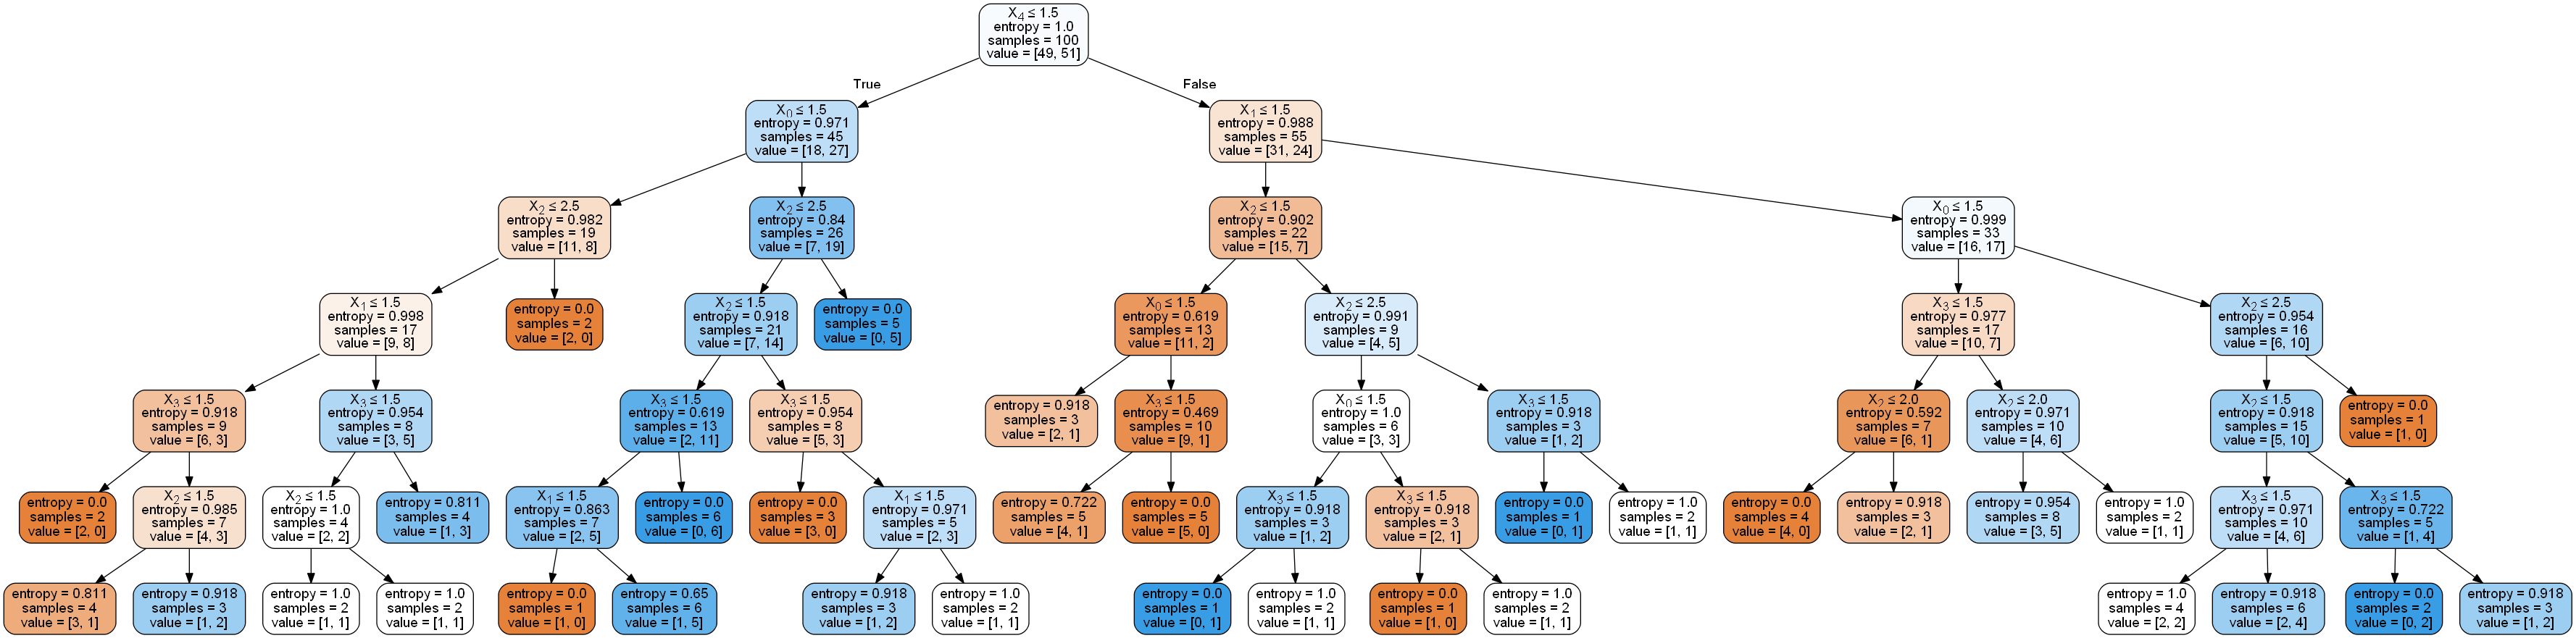

In [49]:
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png(), width=800, height=300)

In [50]:
predict = tree.predict(X)
predict

array([1, 2, 2, 2, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 2, 1, 2,
       1, 2, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 1,
       1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 1, 2, 1, 1, 1, 1, 1], dtype=int64)

In [51]:
from sklearn import metrics
print('Accucary:', metrics.accuracy_score(Y, predict))

Accucary: 0.77
